In [70]:
DATASET_DIR = '/home/ishvlad/datasets/LV-MHP-v2/'
INNER_DIR = 'val'

In [71]:
import os
import sys
import glob
import tqdm
import imageio
import numpy as np

from scipy.io import loadmat
from tqdm.autonotebook import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


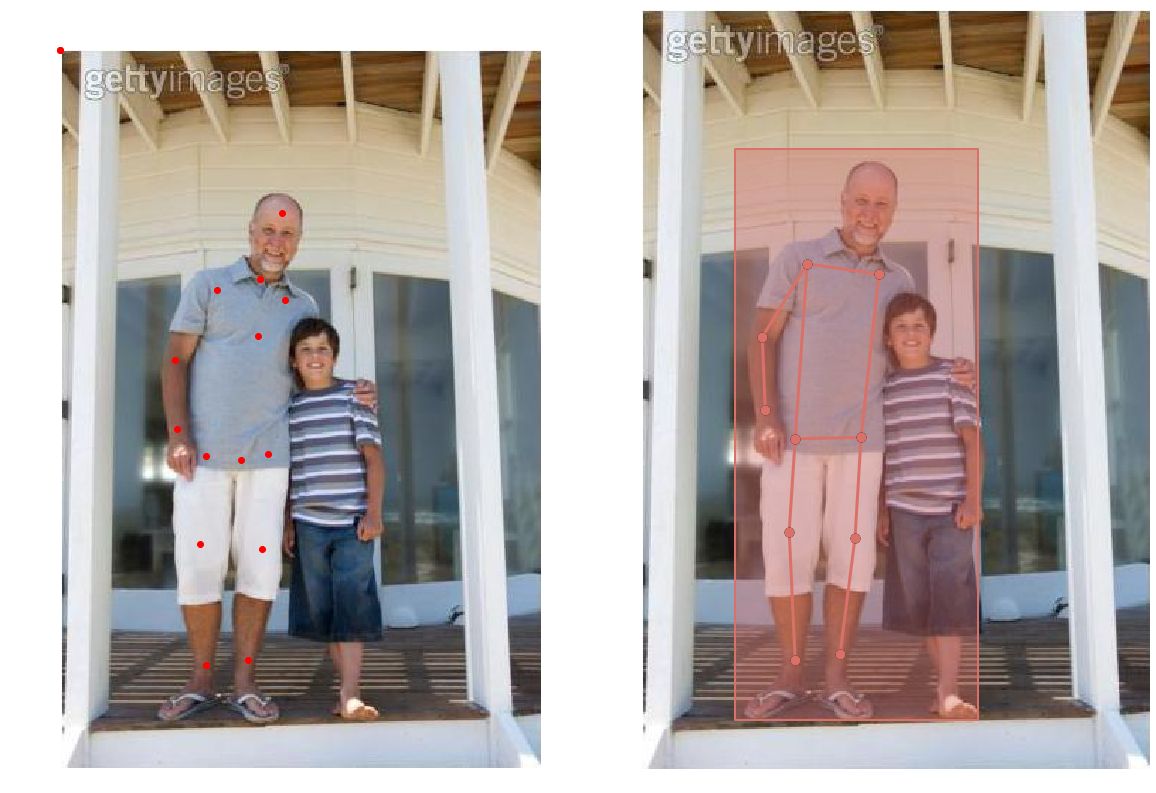

In [97]:
from pycocotools.coco import COCO
from plotting import plot_coco, plot_mhp

# initialize COCO api
coco = COCO(os.path.join(DATASET_DIR, INNER_DIR, 'COCO-annotation.json'))

plt.figure(figsize=(20,15))
image_id = 6878

plt.subplot(1, 2, 1)
_, anno = plot_mhp(image_id);

plt.subplot(1, 2, 2)
_, annos = plot_coco(coco, image_id)

In [ ]:
import json
with open(os.path.join(DATASET_DIR, INNER_DIR, 'COCO-annotation.json'), 'r') as f:
    res = json.load(f)['annotations']
    
for item in res:
    item['score'] = 1.0
    
with open('data/val_GT_results.json', 'w+') as f:
    json.dump(res, f)
    
for item in res:
    item['score'] = 0.5
    
with open('data/val_weak_GT_results.json', 'w+') as f:
    json.dump(res, f)

In [19]:
# EVAL

In [94]:
coco_gt = COCO(os.path.join(DATASET_DIR, INNER_DIR, 'COCO-annotation.json'))

result_file = 'data/val_GT_results.json'
print(type(result_file))
coco_pred = coco_gt.loadRes(result_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
<class 'str'>
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


In [95]:
from pycocotools.cocoeval import COCOeval

coco_eval = COCOeval(coco_gt, coco_pred, 'bbox')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.966
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.966
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.966
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.984
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.354
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.982
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.985
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

In [96]:
coco_eval = COCOeval(coco_gt, coco_pred, 'keypoints')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.987
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.987
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.987
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.986
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.996
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.996
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.996
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.996
